# Pomiar czasu

## Importy

In [9]:
#using Pkg
#Pkg.add("DataFrames")
using DataFrames
#Pkg.add("LinearAlgebra")
using LinearAlgebra

## Parametry generowania

In [12]:
# num of measurements for certain length of vector / matrix
repeats = 10

# number of points to collect the data for
numOfPoints = 40

# by how much to increase length of generater vectors / matrices with every iteration
step = 100

100

## Tworzenie data frame'a

In [19]:
# numer of measurement in a series
measurement_num = [x%10+1 for x in (0 : repeats*numOfPoints - 1)]

# length of multiplied vectors
length = [(div(x, 10)+1)*step for x in (0: repeats*numOfPoints - 1)]

function measure_dot_time(n)
    vec1 = rand(n)
    vec2 = rand(n)
    return @elapsed dot(vec1, vec2)
end

function measure_star_time(n)
    matrix = rand(n, n)
    vector = rand(n)
    return @elapsed matrix * vector
end

# time of dot multiplication
time_dot = [measure_dot_time(n) for n in length]

# time of matrix-vector multiplication
time_star = [measure_star_time(n) for n in length]

# data frame creation
measurements = DataFrame(length=length, measurement_num=measurement_num, time_dot = time_dot, time_star=time_star)

Row,length,measurement_num,time_dot,time_star
,Int64,Int64,Float64,Float64
1,100,1,1.6e-6,5.52e-5
2,100,2,1.0e-7,7.32e-5
3,100,3,0.0,7.8e-5
4,100,4,1.0e-7,3.72e-5
5,100,5,1.0e-7,4.06e-5
6,100,6,1.0e-7,7.49e-5
7,100,7,0.0,3.29e-5
8,100,8,1.0e-7,3.5e-5
9,100,9,1.0e-7,3.26e-5


# Zapisanie i wczytanie danych do/z pliku CSV

## Importy

In [20]:
#Pkg.add("CSV")
using CSV
CSV.write("data.csv", measurements)

"data.csv"

## Wczytanie pliku

In [21]:
data = CSV.read("data.csv", delim=',', DataFrame)

Row,length,measurement_num,time_dot,time_star
,Int64,Int64,Float64,Float64
1,100,1,1.6e-6,5.52e-5
2,100,2,1.0e-7,7.32e-5
3,100,3,0.0,7.8e-5
4,100,4,1.0e-7,3.72e-5
5,100,5,1.0e-7,4.06e-5
6,100,6,1.0e-7,7.49e-5
7,100,7,0.0,3.29e-5
8,100,8,1.0e-7,3.5e-5
9,100,9,1.0e-7,3.26e-5


# Analiza danych i wykresy

## Przekształcenia statystyczne

In [22]:
#Pkg.add("Statistics")
using Statistics

data_gr = groupby(data, [:length])
data_plottable = combine(data_gr, "time_dot" => mean, "time_dot" => std, "time_star" => mean, "time_star" => std)

Row,length,time_dot_mean,time_dot_std,time_star_mean,time_star_std
,Int64,Float64,Float64,Float64,Float64
1,100,2.3e-7,4.83161e-7,4.939e-5,1.91033e-5
2,200,8.0e-8,4.21637e-8,7.667e-5,1.70968e-5
3,300,1.0e-7,4.71405e-8,0.0001127,3.92754e-5
4,400,9.0e-8,5.67646e-8,0.00013746,2.77592e-5
5,500,9.0e-8,3.16228e-8,0.00023078,4.0587e-5
6,600,1.1e-7,3.16228e-8,0.00029055,2.24447e-5
7,700,1.2e-7,4.21637e-8,0.00036314,2.12583e-5
8,800,1.0e-7,0.0,0.00048286,4.79627e-5
9,900,1.4e-7,5.16398e-8,0.00055026,2.51723e-5


## Rysowanie wykresów

In [23]:
#Pkg.add("Plots")
using Plots

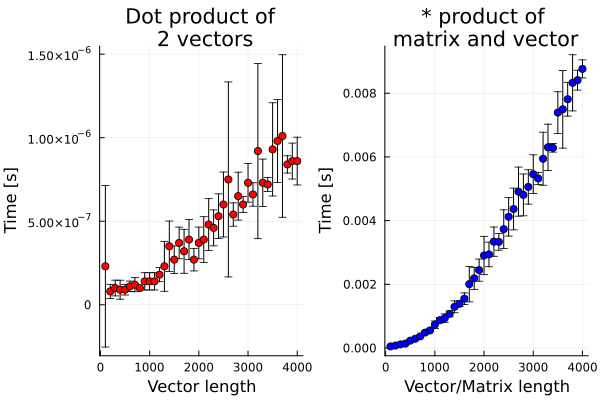

In [24]:
scatter(data_plottable.length,
    [data_plottable.time_dot_mean, data_plottable.time_star_mean],
    yerror=[data_plottable.time_dot_std data_plottable.time_star_std],
    color=[:red :blue],
    layout=2,
    label=missing,
    title=["Dot product of\n 2 vectors" "* product of \nmatrix and vector"],
    xlabel=["Vector length" "Vector/Matrix length"],
    ylabel="Time [s]")